In [1]:
import pandas as pd
import seaborn as sns

In [5]:
df=pd.read_csv('Admission_Predict.csv')

In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
df.shape

(400, 9)

In [13]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
#Binarization is done in column chance of admit where values greater than 0.75 are 1
from sklearn.preprocessing import Binarizer
bi=Binarizer(threshold=0.75)
df['Chance of Admit ']=bi.fit_transform(df[['Chance of Admit ']])

In [21]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [31]:
x=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit ']

In [33]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [41]:
y=y.astype('int')
y

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int32

<Axes: xlabel='Chance of Admit ', ylabel='count'>

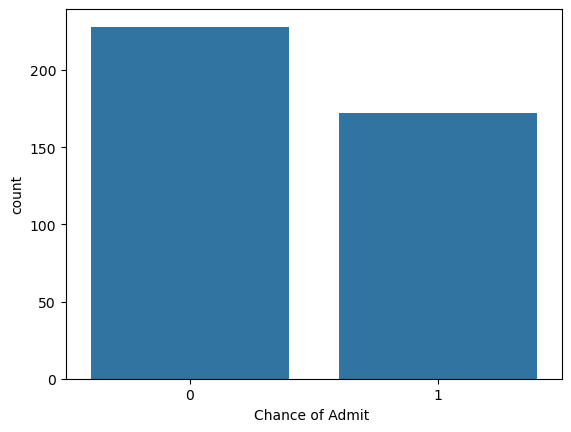

In [43]:
sns.countplot(x=y)

In [47]:
y.value_counts()

Chance of Admit 
0    228
1    172
Name: count, dtype: int64

In [51]:
#Cross validation

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [53]:
x_train.shape

(300, 8)

In [55]:
x_test.shape

(100, 8)

In [57]:
x_test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
132,133,309,105,5,3.5,3.5,8.56,0
309,310,308,110,4,3.5,3.0,8.60,0
341,342,326,110,3,3.5,3.5,8.76,1
196,197,306,105,2,3.0,2.5,8.26,0
246,247,316,105,3,3.0,3.5,8.73,0
...,...,...,...,...,...,...,...,...
146,147,315,105,3,2.0,2.5,8.48,0
135,136,314,109,4,3.5,4.0,8.77,1
390,391,314,102,2,2.0,2.5,8.24,0
264,265,325,110,2,3.0,2.5,8.76,1


In [59]:
#Import the class

from sklearn.tree import DecisionTreeClassifier

In [63]:
classifier=DecisionTreeClassifier(random_state=0)

In [65]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [67]:
y_pred=classifier.predict(x_test)

In [69]:
result=pd.DataFrame({
    'actual':y_test,'predicted':y_pred
})

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import classification_report

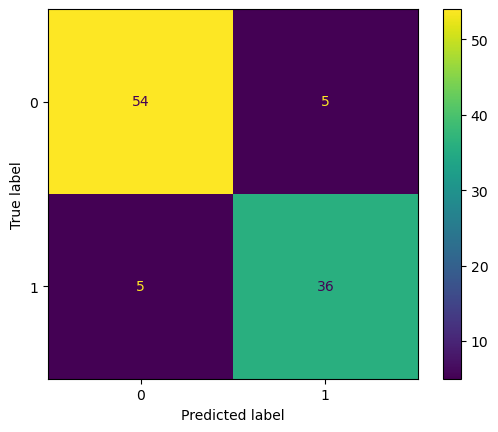

In [75]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [77]:
accuracy_score(y_test,y_pred)

0.9

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.88      0.88      0.88        41

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [83]:
from sklearn.tree import plot_tree

In [91]:
import matplotlib.pyplot as plt

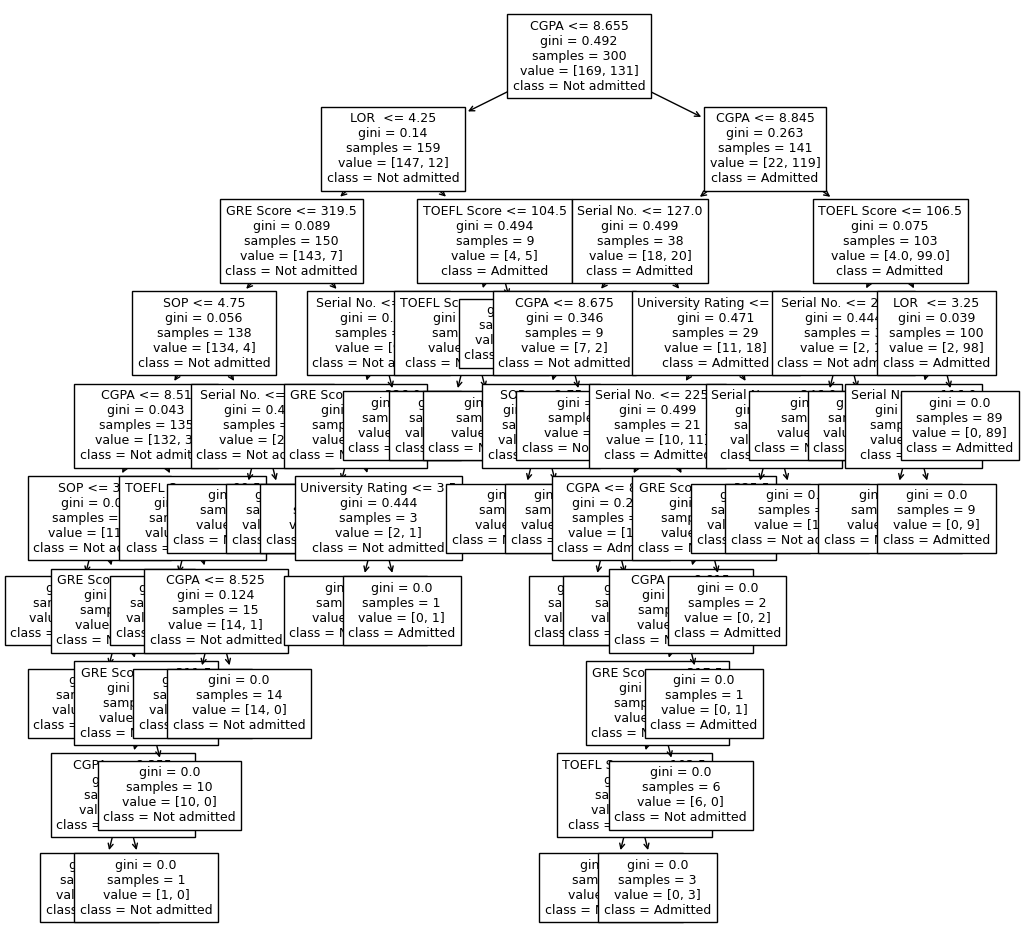

In [95]:
plt.figure(figsize=(12,12))
plot_tree(classifier,fontsize=9,feature_names=x.columns,class_names=['Not admitted','Admitted']);